# Quiz 1: Food vs Feed (30 minutes)

Name: Muhammad Zafeeruddin Bin Mohamed Sakriya

Matric No: MAN 171059

## Overview

The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

Food - refers to the total amount of the food item available as human food during the reference period.
Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

### Instructions
1. Download FAO.csv
2. Read and create Dataframe from the CSV file
Note: The CSV file is Latin1-encoded. Read in the file using, e.g., fao = pd.read_csv("fao.csv", encoding='latin1')
3. Answer the questions by editing this notebook:
    a. What is your strategies to find the outliers of the data?  What type of visualization is the most suitable to find outliers?
    b. Compare between food and feed consumption. Explain your strategies (the steps that you are going to do).



In [6]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [11]:
fao = pd.read_csv('/Users/UsersMac/Desktop/FAO.csv', encoding='latin1')
df = pd.read_csv('/Users/UsersMac/Desktop/FAO.csv', encoding='latin1', sep=',', na_values='.')

In [12]:
fao.head()


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [13]:
fao.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


In [14]:
print(fao)

      Area Abbreviation  Area Code         Area  Item Code  \
0                   AFG          2  Afghanistan       2511   
1                   AFG          2  Afghanistan       2805   
2                   AFG          2  Afghanistan       2513   
3                   AFG          2  Afghanistan       2513   
4                   AFG          2  Afghanistan       2514   
5                   AFG          2  Afghanistan       2514   
6                   AFG          2  Afghanistan       2517   
7                   AFG          2  Afghanistan       2520   
8                   AFG          2  Afghanistan       2531   
9                   AFG          2  Afghanistan       2536   
10                  AFG          2  Afghanistan       2537   
11                  AFG          2  Afghanistan       2542   
12                  AFG          2  Afghanistan       2543   
13                  AFG          2  Afghanistan       2745   
14                  AFG          2  Afghanistan       2549   
15      

<strong>What is your strategies to find the outliers of the data?  What type of visualization is the most suitable to find outliers?<strong>

The strategies used to find outliers in the dataset is by using data visualization. Data visualization help to identify the outliers by projecting a different out of the dataset based data which will be needed on preprocessing stage to clean the unwanted data such as the outlier mentioned. 

The most suitable type of visualization to find outliers is boxplot because the boxplot will have a static max and min range and whatever goes beyond it considered as outlier data.

<strong>Compare between food and feed consumption. Explain your strategies (the steps that you are going to do).

</strong>

<strong>Food</strong>  - Total amount of the food item available as human food.
    <br>
<strong>Feed</strong> -   Total food item available for feeding to the livestock and poultry 

<strong>Steps</strong>
    - Separating the element between Food and Feed
    - Observe the item used for food and feed 
    - Analyze the usage of Elements based on the years of distribution

<strong>Section 2</strong>

In [4]:

import seaborn as sns

In [68]:
data = fao[['Element','Y2013']]
data.head()

,Element,Y2013
0,Food,4895
1,Food,422
2,Feed,360
3,Food,89
4,Feed,200


In [54]:
Food_fao = fao[fao['Element'] == 'Food']


In [55]:
Food_fao.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
5,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,AFG,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12


In [56]:
Feed_fao = fao[fao['Element'] == 'Feed']

In [57]:
Feed_fao.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
9,AFG,2,Afghanistan,2536,Sugar cane,5521,Feed,1000 tonnes,33.94,67.71,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81
10,AFG,2,Afghanistan,2537,Sugar beet,5521,Feed,1000 tonnes,33.94,67.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
14,AFG,2,Afghanistan,2549,"Pulses, Other and products",5521,Feed,1000 tonnes,33.94,67.71,...,3.0,2.0,3.0,3.0,3.0,5.0,4.0,5.0,4,4


In [20]:
fao['Item']

0                  Wheat and products
1            Rice (Milled Equivalent)
2                 Barley and products
3                 Barley and products
4                  Maize and products
5                  Maize and products
6                 Millet and products
7                      Cereals, Other
8               Potatoes and products
9                          Sugar cane
10                         Sugar beet
11             Sugar (Raw Equivalent)
12                  Sweeteners, Other
13                              Honey
14         Pulses, Other and products
15         Pulses, Other and products
16                  Nuts and products
17              Coconuts - Incl Copra
18                        Sesame seed
19       Olives (including preserved)
20                       Soyabean Oil
21                      Groundnut Oil
22                  Sunflowerseed Oil
23               Rape and Mustard Oil
24                     Cottonseed Oil
25                           Palm Oil
26          

In [15]:
fao.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


In [16]:
fao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
Area Abbreviation    21477 non-null object
Area Code            21477 non-null int64
Area                 21477 non-null object
Item Code            21477 non-null int64
Item                 21477 non-null object
Element Code         21477 non-null int64
Element              21477 non-null object
Unit                 21477 non-null object
latitude             21477 non-null float64
longitude            21477 non-null float64
Y1961                17938 non-null float64
Y1962                17938 non-null float64
Y1963                17938 non-null float64
Y1964                17938 non-null float64
Y1965                17938 non-null float64
Y1966                17938 non-null float64
Y1967                17938 non-null float64
Y1968                17938 non-null float64
Y1969                17938 non-null float64
Y1970                17938 non-null float64
Y1971                1

In [17]:
#Checking Missing values in dataset
fao.notnull().head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [18]:
#sum of the null data sets 
fao.isnull().sum()

Area Abbreviation       0
Area Code               0
Area                    0
Item Code               0
Item                    0
Element Code            0
Element                 0
Unit                    0
latitude                0
longitude               0
Y1961                3539
Y1962                3539
Y1963                3539
Y1964                3539
Y1965                3539
Y1966                3539
Y1967                3539
Y1968                3539
Y1969                3539
Y1970                3539
Y1971                3539
Y1972                3539
Y1973                3539
Y1974                3539
Y1975                3539
Y1976                3539
Y1977                3539
Y1978                3539
Y1979                3539
Y1980                3539
                     ... 
Y1984                3539
Y1985                3539
Y1986                3539
Y1987                3539
Y1988                3539
Y1989                3539
Y1990                3415
Y1991       

In [19]:
df.notnull().sum()

Area Abbreviation    21477
Area Code            21477
Area                 21477
Item Code            21477
Item                 21477
Element Code         21477
Element              21477
Unit                 21477
latitude             21477
longitude            21477
Y1961                17938
Y1962                17938
Y1963                17938
Y1964                17938
Y1965                17938
Y1966                17938
Y1967                17938
Y1968                17938
Y1969                17938
Y1970                17938
Y1971                17938
Y1972                17938
Y1973                17938
Y1974                17938
Y1975                17938
Y1976                17938
Y1977                17938
Y1978                17938
Y1979                17938
Y1980                17938
                     ...  
Y1984                17938
Y1985                17938
Y1986                17938
Y1987                17938
Y1988                17938
Y1989                17938
Y

In [21]:
#as we compare between 'Food' & 'Feed". We explore the columns in depth.
fao["Element"].unique()

array([u'Food', u'Feed'], dtype=object)

In [23]:
fao["Element"].value_counts()

Food    17528
Feed     3949
Name: Element, dtype: int64

In [24]:
fao["Element"].value_counts().sum()


21477

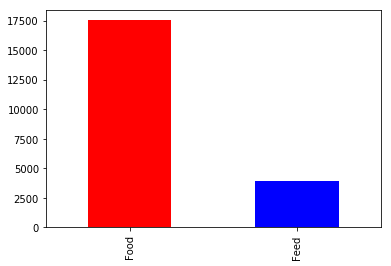

In [25]:
fao["Element"].value_counts()[:].plot(kind='bar', color=['red','blue'])

In [26]:
#products that available for 'feed' and 'food'
fao["Item"]

0                  Wheat and products
1            Rice (Milled Equivalent)
2                 Barley and products
3                 Barley and products
4                  Maize and products
5                  Maize and products
6                 Millet and products
7                      Cereals, Other
8               Potatoes and products
9                          Sugar cane
10                         Sugar beet
11             Sugar (Raw Equivalent)
12                  Sweeteners, Other
13                              Honey
14         Pulses, Other and products
15         Pulses, Other and products
16                  Nuts and products
17              Coconuts - Incl Copra
18                        Sesame seed
19       Olives (including preserved)
20                       Soyabean Oil
21                      Groundnut Oil
22                  Sunflowerseed Oil
23               Rape and Mustard Oil
24                     Cottonseed Oil
25                           Palm Oil
26          

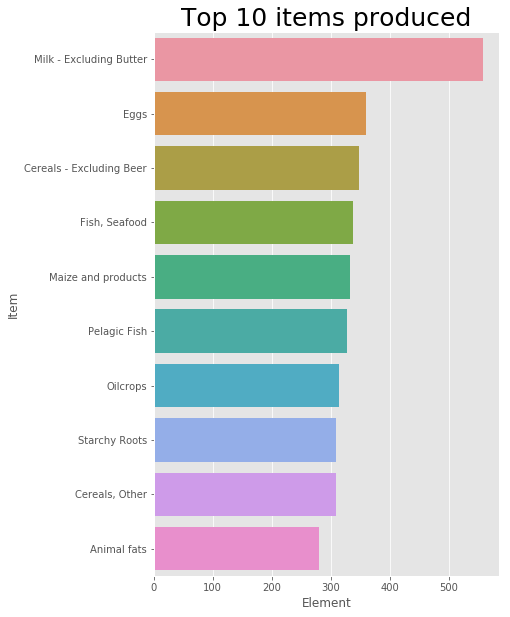

In [27]:
plt.style.use("ggplot")
items=pd.DataFrame(fao.groupby("Item")["Element"].agg("count").sort_values(ascending=False))[:10]
plt.figure(figsize=(8,10))
plt.gcf().subplots_adjust(left=.3)
sns.barplot(x=items.Element,y=items.index,data=items)
plt.gca().set_title("Top 10 items produced",fontsize=25)
plt.show()

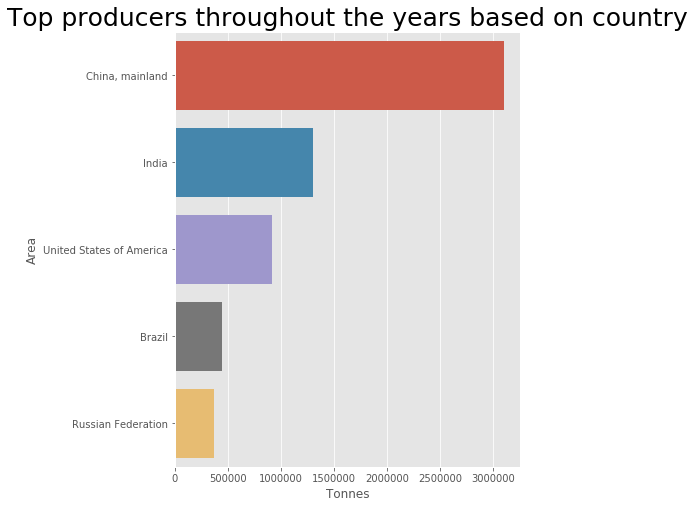

In [37]:
#Top producers throughout the years based on Country
top_countries=fao.groupby(["Area"])[["Y2011","Y2012","Y2013"]].sum()
top=pd.DataFrame(top_countries.agg("mean",axis=1).sort_values(ascending=False),columns=["Tonnes"])[:5]

plt.figure(figsize=(8,8))
plt.gca().set_title("Top producers throughout the years based on country", size=25)
sns.barplot(x=top["Tonnes"],y=top.index,data=top)
plt.gcf().subplots_adjust(left=.3)
plt.show()

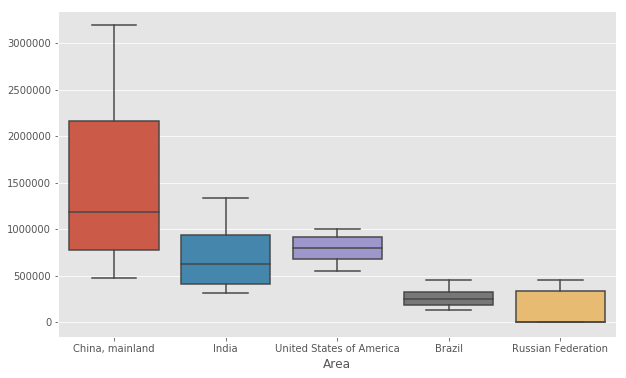

In [36]:
#boxplot of top producer
top_box=fao.groupby("Area").agg("sum").loc[top.index].drop(["Area Code","Item Code", "latitude","longitude",
                                                           "Element Code"],axis=1)
top_box=top_box.transpose()
plt.style.use("ggplot")
plt.figure(figsize=(10,6))
sns.boxplot(data=top_box)
plt.show()

In [38]:
#outlier detection based on produced food and feed on recent year (2013)
#year 2013
# N < 0.0 &&  N > 1701.8 is considered as outlier.
lower_bound = 0.1
upper_bound = 0.95
res = fao.Y2013.quantile([lower_bound, upper_bound])
res

0.10       0.0
0.95    1701.8
Name: Y2013, dtype: float64

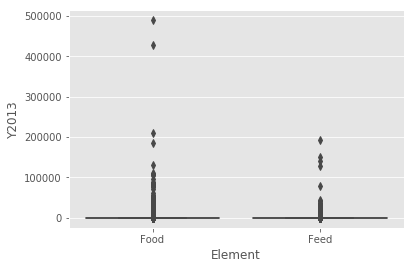

In [39]:
box = sns.boxplot(x="Element", y= "Y2013", data=fao)

#Conclusion

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population, they may indicate a variability in a measurement, experimental errors or a novelty. Box plots has been used to detect outliers. A box plot is a graphical display for describing the distribution of the data. Box plots use the median and the lower and upper quartiles to calculate abd show the outliers occurs in the data.